Starting code for Problem 3:

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import scipy.io as io
import copy as copy
import csv
import datetime
import xarray as xr
import matplotlib as mpl
import cartopy as ct

Code for Problem 3:

   ATCF    Name  Date   time  ftime(hr)  VMAX0  NCI  OBDV  DSDV  LGDV  ...  \
0  AL01  ANDREA  2013  60600         12   35.0    4  18.0   2.0   1.0  ...   
1  AL01  ANDREA  2013  60606         12   45.0    4   7.0   1.0   2.0  ...   
2  AL01  ANDREA  2013  60612         12   50.0    4  -6.0  -3.0   0.0  ...   
3  AL01  ANDREA  2013  60618         12   55.0    4  -4.5  -7.5  -6.5  ...   
4  AL01  ANDREA  2013  60700         12   40.0    4   6.2  -1.8  -1.8  ...   

   EMDX  EGDX  HWDX  LONC  OBDY  AVDY  EMDY  EGDY  HWDY  LATC  
0  -0.0  -0.0 -93.9  85.4  38.9  50.0   0.0   0.0 -50.0  27.5  
1  -0.0 -16.2 -55.0  84.7 -33.3  44.4   0.0 -11.1 -33.3  29.2  
2   7.2  16.8 -31.2  83.0 -50.0  16.7   5.6  16.7 -38.9  30.2  
3  14.2  23.6 -23.6  81.6 -30.6  25.0 -30.6  -8.3  13.9  31.9  
4  -0.0  27.9 -27.9  80.3  38.9  16.7 -27.8  16.7  -5.6  33.2  

[5 rows x 31 columns]
len(y_fit) = 3258, len(y_test) = 815
[-2.91280409e+00  8.76356148e-01 -1.91111603e-01  1.71829508e-01
  2.23830580e-01  5.03

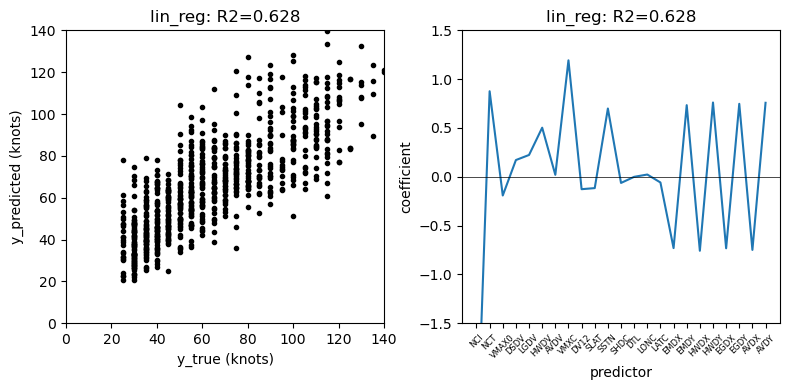

In [20]:

# Get the data
import pandas as pd
from sklearn import linear_model
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
# ---------------------
LEADTIME = 48
x_names = [
"NCI","NCT","VMAX0","DSDV","LGDV","HWDV","AVDV","VMXC","DV12","SLAT",
"SSTN","SHDC","DTL","LONC","LATC","EMDX","EMDY","HWDX","HWDY","EGDX",
"EGDY","AVDX","AVDY",]
# ---------------------
datafile_path = "hurricane_02-Jun-2022.dat"
df = pd.read_table(datafile_path, sep="\s+")
print(df.head())
df = df[df["ftime(hr)"] == LEADTIME].reset_index(drop=True)
y = df["VMXC"] + df["OBDV"]
X = df[x_names]
# split into data to use during fitting and data to test
n_fit = int(0.80 * len(y))
X_fit = X[:n_fit]
y_fit = y[:n_fit]
X_test = X[n_fit:]
y_test = y[n_fit:]
print(f"{len(y_fit) = }, {len(y_test) = }")
# Example of working with sklearn.linear_model.LinearRegression()
# Ordinary Least Squares
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_fit, y_fit)
# Print stats
print(lin_reg.coef_)
print(lin_reg.score(X_test, y_test))
# PLOTS
plt.figure(figsize=(8,4))
# Plot predictions vs truth
plt.subplot(1,2,1)
plt.plot(y_test, lin_reg.predict(X_test), ".k")
plt.title(f"lin_reg: R2={lin_reg.score(X_test,y_test).round(4)}")
plt.xlabel("y_true (knots)")
plt.ylabel("y_predicted (knots)")
plt.ylim(0, 140)
plt.xlim(0, 140)
# Plot coefficients
plt.subplot(1,2,2)
plt.plot(lin_reg.coef_)
plt.axhline(y=0, linewidth=0.5, color="k")
plt.xticks(range(len(x_names)), x_names, rotation=45, fontsize=6)

plt.ylim(-1.5, 1.5)
plt.title(f"lin_reg: R2={lin_reg.score(X_test,y_test).round(4)}")
plt.xlabel("predictor")
plt.ylabel("coefficient")
plt.tight_layout()
plt.show()

In [21]:
alpha = np.geomspace(1, 1e8, 9)
# add a number at as the firs element of the array
alpha = np.insert(alpha, 0, 0)
alpha

array([0.e+00, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06,
       1.e+07, 1.e+08])

# Source : https://github.com/masoud-akbarzadeh/course_objective_analysis/blob/main/code/regularization_techniques_l1_l2.ipynb

C:\Users\masou\anaconda3\Lib\site-packages\sklearn\base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\masou\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\masou\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.898e+05, tolerance: 2.806e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinat

NameError: name 'names' is not defined

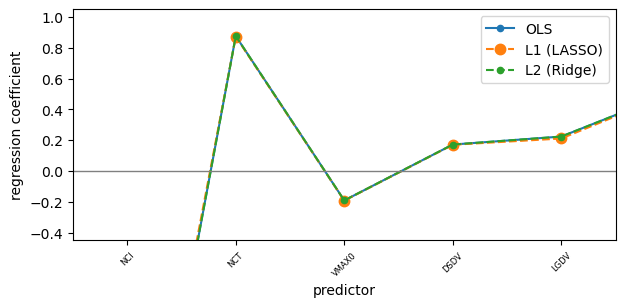

In [24]:
#--------------------------------------
# Regression Fitting
for a in alpha:
    regOLS = linear_model.LinearRegression(fit_intercept=True)
    regL1 = linear_model.Lasso(alpha=a, fit_intercept=True, max_iter=10000)
    regL2 = linear_model.Ridge(alpha=a, fit_intercept=True, max_iter=10000)
    
    regOLS.fit(X_fit,y_fit)
    regL1.fit(X_fit,y_fit)
    regL2.fit(X_fit,y_fit)
    
    predictOLS = regOLS.predict(X_test)
    predictL1 = regL1.predict(X_test)
    predictL2 = regL2.predict(X_test)
    
    MS = 4

    plt.figure(figsize=(7,3))
    plt.plot(regOLS.coef_,'.-', markersize=9, label='OLS')
    plt.plot(regL1.coef_,'.--', markersize=15, label='L1 (LASSO)')
    plt.plot(regL2.coef_,'.--', markersize=9, label='L2 (Ridge)')
    plt.xticks(range(len(x_names)), x_names, rotation=45, fontsize=6)
    plt.xlabel('predictor')
    plt.ylabel('regression coefficient')
    plt.axhline(y=0,color='gray', linewidth=1)
    plt.legend()
    plt.xlim(-.5,4.5)
    plt.ylim(-.45,1.05)
    plt.title('predicting ' + names[0])
    plt.show()
    
    plt.figure(figsize=(7/1.5,4/1.5))
    plt.title('predicted vs actual value...')
    plt.plot(y_test,predictOLS, '.', markersize=MS, label='OLS')
    plt.plot(y_test,predictL1, '.', markersize=MS, label='L1')
    # plt.plot(y_test,predictL2, '.', markersize=MS, label='L2')
    plt.plot((-3,3),(-3,3),'-k')
    plt.ylabel('predicted value')
    plt.xlabel('actual value')
    plt.legend()
    plt.show()
    
    plt.xticks(range(len(x_names)), x_names, rotation=45, fontsize=6)

    plt.ylim(-1.5, 1.5)
    plt.title(f"lin_reg: R2={lin_reg.score(X_test,y_test).round(4)}")
    plt.xlabel("predictor")
    plt.ylabel("coefficient")
    plt.tight_layout()
    plt.show()
    

In [ ]:
# r, p = stats.pearsonr(Xs[:, 0], Ys[:, 0])
# cc=    stats.correlate(Xs[:, 0], Xs[:, 0], 'same'))